# **Imports**

In this section, necessary libraries are imported. Install the below package if needed.

In [ ]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Loading Pre-Processed Data**

In [ ]:
race_features = pd.read_csv("/DATA/Final_testing_data/Race_Data_model.csv")

In [ ]:
print(race_features)

        text_len_norm  mean_w2v     ld_mtld   ld_maas  ld_hdd  syllable_count  \
0           -0.291753  0.065124   14.000000  0.000000     1.0              12   
1           -0.179573  0.192226   87.500000  0.008048     1.0              17   
2           -0.559153  0.180231    9.000000  0.000000     1.0               9   
3           -0.097242 -0.049238  148.120000  0.004521     1.0              20   
4            2.678236  0.064928  113.402996  0.015657     1.0             452   
...               ...       ...         ...       ...     ...             ...   
368483      -0.486032 -0.011316  112.000000  0.005716     1.0              15   
368484      -0.530515  0.238537    2.000000  0.000000     1.0               4   
368485      -0.500370  0.102371   26.930556  0.018109     1.0              14   
368486       0.560136  0.044250  144.000000  0.007400     1.0              52   
368487      -0.604475 -0.112263   54.880000  0.010641     1.0              12   

        percent_diff_words 

# **Experiments with 'Feature Set' Only**
## **Logistic Regression Model**

In [ ]:
X = race_features[['text_len_norm', 'mean_w2v', 'ld_mtld',
       'ld_maas', 'ld_hdd', 'syllable_count', 'percent_diff_words', 'NN', 'CC',
       'VBZ', 'DT', 'RB', 'CD', 'WDT', 'JJ', 'NNS', 'IN', 'PRP$', 'NNP', 'VBN',
       'TO', 'VBG', 'WP', 'WRB', 'VBD', 'NNPS', 'VBP', 'JJS', 'PRP', 'VB',
       'JJR', 'MD', 'RP', 'RBR', 'EX', 'FW', 'RBS', 'PDT', 'UH', '$', 'WP$',
       'LS', 'pos_sent', 'neg_sent', 'neu_sent']]

In [ ]:
X = race_features.drop(columns=['race_category'])

In [ ]:
Y = race_features[['race_category']]

In [ ]:
X.to_numpy()
Y.to_numpy()

array([[3],
       [3],
       [1],
       ...,
       [1],
       [2],
       [0]])

In [ ]:
print(X)

        text_len_norm  mean_w2v     ld_mtld   ld_maas  ld_hdd  syllable_count  \
0           -0.291753  0.065124   14.000000  0.000000     1.0              12   
1           -0.179573  0.192226   87.500000  0.008048     1.0              17   
2           -0.559153  0.180231    9.000000  0.000000     1.0               9   
3           -0.097242 -0.049238  148.120000  0.004521     1.0              20   
4            2.678236  0.064928  113.402996  0.015657     1.0             452   
...               ...       ...         ...       ...     ...             ...   
368483      -0.486032 -0.011316  112.000000  0.005716     1.0              15   
368484      -0.530515  0.238537    2.000000  0.000000     1.0               4   
368485      -0.500370  0.102371   26.930556  0.018109     1.0              14   
368486       0.560136  0.044250  144.000000  0.007400     1.0              52   
368487      -0.604475 -0.112263   54.880000  0.010641     1.0              12   

        percent_diff_words 

We standardize the train and test data before model training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(solver='lbfgs', C=0.5, multi_class='multinomial',
                           random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, multi_class='multinomial', random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.7385223379354795

In [ ]:
model.score(X_test, y_test)

0.740467855301365

**## Plotting Results of Logistic Regression Model**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["Asian", "Black", "White", "Native American"]
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

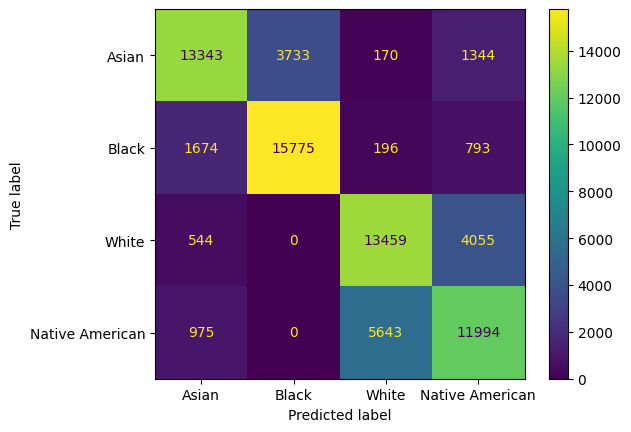

In [ ]:
disp.plot()

## **Decision Tree Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
# Decision tree with entropy
decision_tree = DecisionTreeClassifier(
            criterion = "entropy", random_state = 42,
            max_depth = 15, min_samples_leaf = 5)
  
# Performing training
decision_tree.fit(X_train, y_train)

y_pred_train = decision_tree.predict(X_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train), "\n")

# generate predictions
y_pred_test = decision_tree.predict(X_test)

print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test), "\n")


Train Accuracy:  0.9946165066657621 

Test Accuracy:  0.9942603598469429 



**## Plotting Results of Decision Tree Model**

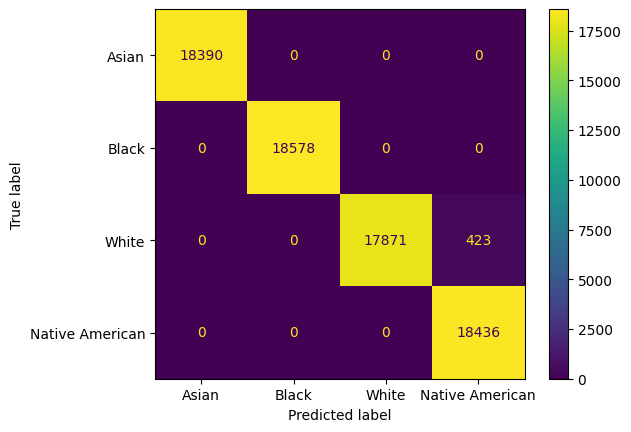

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["Asian", "Black", "White", "Native American"]
cm = confusion_matrix(y_test, y_pred_test, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# **Experiments with 'Feature Set' + Top 20 'tfidf' features**
## **Logistic Regression Model**

In [ ]:
X = race_features.drop(columns=['race_category'])

In [ ]:
Y = race_features[['race_category']]

In [ ]:
X.to_numpy()
Y.to_numpy()

array([[3],
       [3],
       [1],
       ...,
       [1],
       [2],
       [0]])

In [ ]:
print(X)

        text_len_norm  mean_w2v     ld_mtld   ld_maas  ld_hdd  syllable_count  \
0           -0.291753  0.065124   14.000000  0.000000     1.0              12   
1           -0.179573  0.192226   87.500000  0.008048     1.0              17   
2           -0.559153  0.180231    9.000000  0.000000     1.0               9   
3           -0.097242 -0.049238  148.120000  0.004521     1.0              20   
4            2.678236  0.064928  113.402996  0.015657     1.0             452   
...               ...       ...         ...       ...     ...             ...   
368483      -0.486032 -0.011316  112.000000  0.005716     1.0              15   
368484      -0.530515  0.238537    2.000000  0.000000     1.0               4   
368485      -0.500370  0.102371   26.930556  0.018109     1.0              14   
368486       0.560136  0.044250  144.000000  0.007400     1.0              52   
368487      -0.604475 -0.112263   54.880000  0.010641     1.0              12   

        percent_diff_words 

We standardize the train and test data before model training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(solver='lbfgs', C=0.5, multi_class='multinomial',
                           random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, multi_class='multinomial', random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.7398385291224261

In [ ]:
model.score(X_test, y_test)

0.7379983174577329

**## Plotting Results of Logistic Regression Model**

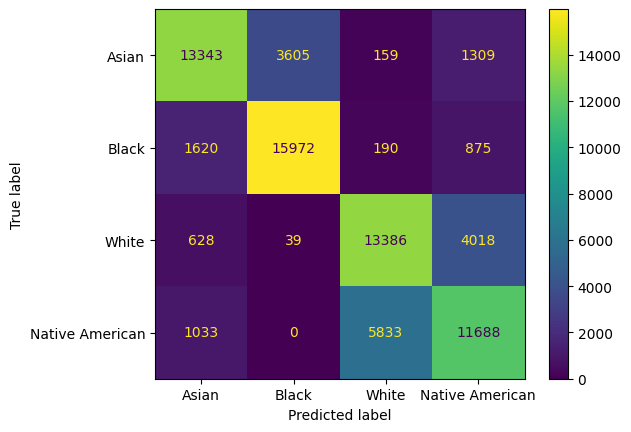

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["Asian", "Black", "White", "Native American"]
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

## **Decision Tree Model**

In [ ]:
X = race_features.drop(columns=['race_category'])

In [ ]:
Y = race_features[['race_category']]

In [ ]:
X.to_numpy()
Y.to_numpy()

array([[3],
       [3],
       [1],
       ...,
       [1],
       [2],
       [0]])

In [ ]:
print(X)

        text_len_norm  mean_w2v     ld_mtld   ld_maas  ld_hdd  syllable_count  \
0           -0.291753  0.065124   14.000000  0.000000     1.0              12   
1           -0.179573  0.192226   87.500000  0.008048     1.0              17   
2           -0.559153  0.180231    9.000000  0.000000     1.0               9   
3           -0.097242 -0.049238  148.120000  0.004521     1.0              20   
4            2.678236  0.064928  113.402996  0.015657     1.0             452   
...               ...       ...         ...       ...     ...             ...   
368483      -0.486032 -0.011316  112.000000  0.005716     1.0              15   
368484      -0.530515  0.238537    2.000000  0.000000     1.0               4   
368485      -0.500370  0.102371   26.930556  0.018109     1.0              14   
368486       0.560136  0.044250  144.000000  0.007400     1.0              52   
368487      -0.604475 -0.112263   54.880000  0.010641     1.0              12   

        percent_diff_words 

We standardize the train and test data before model training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
# Decision tree with entropy
decision_tree = DecisionTreeClassifier(
            criterion = "entropy", random_state = 42,
            max_depth = 15, min_samples_leaf = 5)
  
# Performing training
decision_tree.fit(X_train, y_train)

y_pred_train = decision_tree.predict(X_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train), "\n")

# generate predictions
y_pred_test = decision_tree.predict(X_test)

print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test), "\n")

Train Accuracy:  0.9967977204111401 

Test Accuracy:  0.9964449510163098 



**## Plotting Results of Decision Tree Model**

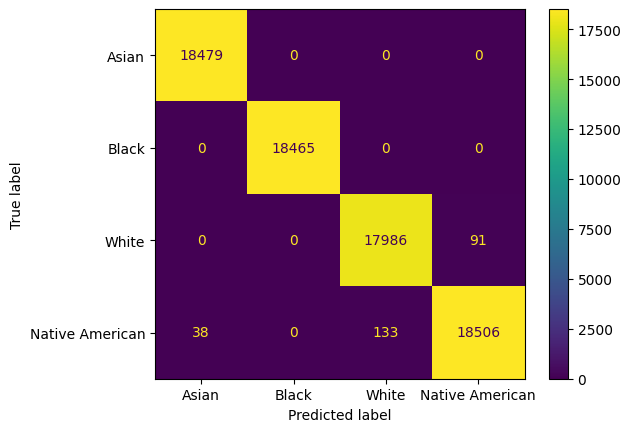

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["Asian", "Black", "White", "Native American"]
cm = confusion_matrix(y_test, y_pred_test, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# **SHAPLEY values for Identifying Top Features**

Here we use the XGBRegressor model results for fetching the top features in race prediction.

In [ ]:
!pip install pyLDAvis

import pyLDAvis
pyLDAvis.enable_notebook()

import pyLDAvis.gensim_models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [ ]:
!pip install xgboost

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = xgboost.XGBRegressor().fit(X_train, y_train) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9997169422885895

In [ ]:
!pip install shap
import shap
shap.initjs()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


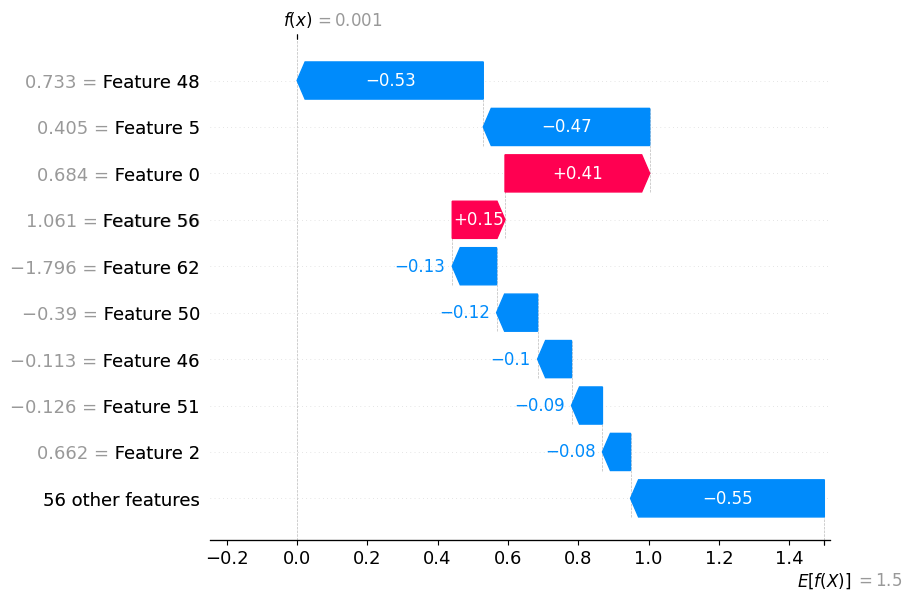

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


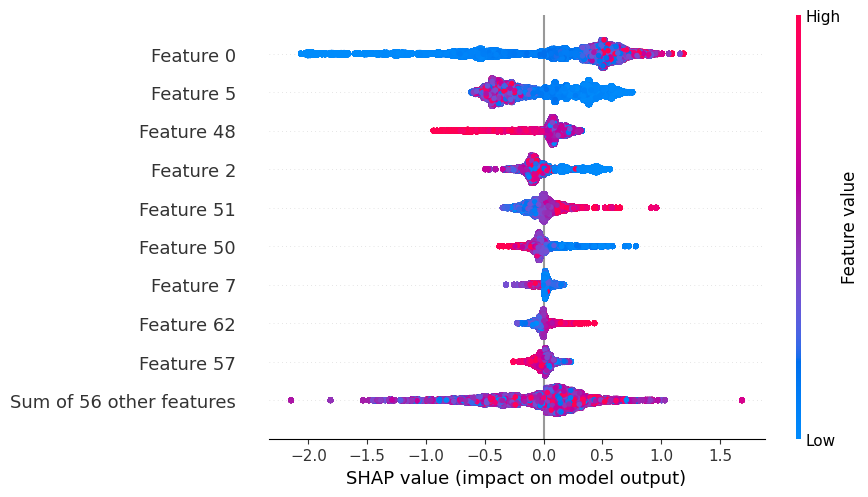

In [ ]:
shap.plots.beeswarm(shap_values)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


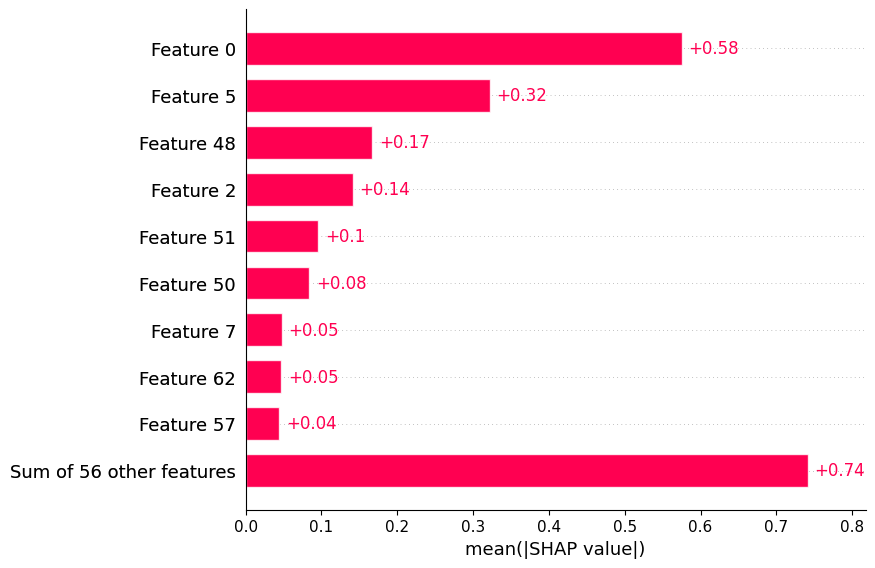

In [ ]:
shap.plots.bar(shap_values)